# Import Libs and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('dataset/Train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


# One Hot Encode

Karena masih ada fitur kategorikal, maka diperlukan perlakuan terhadap kolom-kolom tersebut. Pada kali ini saya menggunakan One Hot Encoding dikarenakan unique value yang ada tidak terlalu banyak, sehingga masih memungkinkan jika diperlakukan OHE.

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
encoder = OneHotEncoder(sparse=False)

In [5]:
# Categorical Features
ohe_column = ['is_holiday', 'weather_type', 'weather_description']

In [6]:
encoded_data = encoder.fit_transform(df[ohe_column])

c:\Users\Naufal\anaconda3\envs\XAI\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
encoded_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 61 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   is_holiday_Christmas Day                                 33750 non-null  float64
 1   is_holiday_Columbus Day                                  33750 non-null  float64
 2   is_holiday_Independence Day                              33750 non-null  float64
 3   is_holiday_Labor Day                                     33750 non-null  float64
 4   is_holiday_Martin Luther King Jr Day                     33750 non-null  float64
 5   is_holiday_Memorial Day                                  33750 non-null  float64
 6   is_holiday_New Years Day                                 33750 non-null  float64
 7   is_holiday_State Fair                                    33750 non-null  float64
 8   is_holiday_Thanksgiving Da

Simpan encoder agar dapat digunakan kembali pada pengolahan data lainnya.

In [10]:
import joblib

# Save the encoder to a file so can be used in other files
joblib.dump(encoder, 'outputs/oneHotEncoder.joblib')

['outputs/oneHotEncoder.joblib']

# Concat Encoded Cols to Main df

In [11]:
df_concated = pd.concat([df, df_encoded], axis=1)

In [12]:
df_concated.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)

In [13]:
df_concated.info()
df_concated.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 73 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   date_time                                                33750 non-null  object 
 1   air_pollution_index                                      33750 non-null  int64  
 2   humidity                                                 33750 non-null  int64  
 3   wind_speed                                               33750 non-null  int64  
 4   wind_direction                                           33750 non-null  int64  
 5   visibility_in_miles                                      33750 non-null  int64  
 6   dew_point                                                33750 non-null  int64  
 7   temperature                                              33750 non-null  float64
 8   rain_p_h                  

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering

In [14]:
df_concated['date_time'] = pd.to_datetime(df_concated['date_time'])

# Extracting date, month, and time
df_concated['day'] = df_concated['date_time'].dt.day
df_concated['month'] = df_concated['date_time'].dt.month
df_concated['hour'] = df_concated['date_time'].dt.hour

In [15]:
# Put Target column to the last column
df_target = df_concated['traffic_volume']
df_concated.drop(columns=['traffic_volume'], inplace=True)
df_concated['traffic_volume'] = df_target

In [16]:
# Display the updated DataFrame
df_concated.info()
df_concated.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 76 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   date_time                                                33750 non-null  datetime64[ns]
 1   air_pollution_index                                      33750 non-null  int64         
 2   humidity                                                 33750 non-null  int64         
 3   wind_speed                                               33750 non-null  int64         
 4   wind_direction                                           33750 non-null  int64         
 5   visibility_in_miles                                      33750 non-null  int64         
 6   dew_point                                                33750 non-null  int64         
 7   temperature                                      

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume
0,2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,9,5545
1,2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,10,4516
2,2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,11,4767
3,2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,12,5026
4,2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,13,4918


In [17]:
df_concated.to_csv('dataset/df_concated.csv', index=False)

# Default Dataset

In [18]:
df_default = df_concated.copy()

In [19]:
# Set the 'datetime_col' as the index of the DataFrame
df_default = df_default.set_index('date_time')

In [20]:
df_default.info()
df_default.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 75 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   air_pollution_index                                      33750 non-null  int64  
 1   humidity                                                 33750 non-null  int64  
 2   wind_speed                                               33750 non-null  int64  
 3   wind_direction                                           33750 non-null  int64  
 4   visibility_in_miles                                      33750 non-null  int64  
 5   dew_point                                                33750 non-null  int64  
 6   temperature                                              33750 non-null  float64
 7   rain_p_h                                                 33750 non-null  floa

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,...,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,40,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,9,5545
2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,75,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,10,4516
2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,90,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,11,4767
2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,90,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,12,5026
2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,75,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,13,4918


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_default)
scaled_data = scaler.transform(df_default)

In [23]:
import joblib

# Save the scaler to a file so can be used in other files
joblib.dump(scaler, 'outputs/minMaxScaler.joblib')

['outputs/minMaxScaler.joblib']

In [24]:
df_scaled = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out())

In [25]:
df_scaled.index = df_default.index

In [26]:
df_scaled.info()
df_scaled.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 75 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   air_pollution_index                                      33750 non-null  float64
 1   humidity                                                 33750 non-null  float64
 2   wind_speed                                               33750 non-null  float64
 3   wind_direction                                           33750 non-null  float64
 4   visibility_in_miles                                      33750 non-null  float64
 5   dew_point                                                33750 non-null  float64
 6   temperature                                              33750 non-null  float64
 7   rain_p_h                                                 33750 non-null  floa

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,...,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,0.384083,0.873563,0.1250,0.913889,0.000,0.000,0.935245,0.0,0.0,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.818182,0.391304,0.761676
2012-10-02 10:00:00,0.581315,0.620690,0.1875,0.916667,0.000,0.000,0.938749,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.818182,0.434783,0.620330
2012-10-02 11:00:00,0.356401,0.609195,0.1875,0.913889,0.125,0.125,0.939463,0.0,0.0,0.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.818182,0.478261,0.654808
2012-10-02 12:00:00,0.034602,0.609195,0.1875,0.913889,0.500,0.500,0.941247,0.0,0.0,0.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.818182,0.521739,0.690385
2012-10-02 13:00:00,0.937716,0.597701,0.1875,0.913889,0.750,0.750,0.944524,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.818182,0.565217,0.675549


# Reshape to fit RNN needs

In [27]:
trainX = []
trainY = []

In [28]:
n_future = 1   # Number of data we want to look into the future based on the past data.
n_past = 20  # Number of past data we want to use to predict the future.

In [29]:
for i in range(n_past, len(scaled_data) - n_future +1):
    trainX.append(scaled_data[i - n_past:i, 0:df_scaled.shape[1]])
    trainY.append(scaled_data[i + n_future - 1:i + n_future, -1])

trainX, trainY = np.array(trainX), np.array(trainY)

In [30]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (33730, 20, 75).
trainY shape == (33730, 1).


In [31]:
np.save('outputs/default_train_x.npy', trainX)
np.save('outputs/default_train_y.npy', trainY)

# Baseline Model

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [33]:
total_samples = trainX.shape[0]
split_index = int(total_samples * 0.9)

X_train = trainX[:split_index]
y_train = trainY[:split_index]
X_test = trainX[split_index:]
y_test = trainY[split_index:]

In [34]:
print(f'X_train length == {len(X_train)}')
print(f'X_test length == {len(X_test)}')

X_train length == 30357
X_test length == 3373


## LSTM

In [35]:
model_LSTM = Sequential ([
    LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(trainY.shape[1])
])

model_LSTM.compile(optimizer='adam', loss='mae')
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            35840     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 48289 (188.63 KB)
Trainable params: 48289 (188.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
1708/1708 [==============================] - 26s 15ms/step - loss: 0.0573 - val_loss: 0.0378
Epoch 2/50
1708/1708 [==============================] - 27s 16ms/step - loss: 0.0570 - val_loss: 0.0405
Epoch 3/50
1708/1708 [==============================] - 25s 15ms/step - loss: 0.0570 - val_loss: 0.0432
Epoch 4/50
1708/1708 [==============================] - 25s 15ms/step - loss: 0.0564 - val_loss: 0.0371
Epoch 5/50
1708/1708 [==============================] - 26s 15ms/step - loss: 0.0561 - val_loss: 0.0391
Epoch 6/50
1708/1708 [==============================] - 26s 15ms/step - loss: 0.0558 - val_loss: 0.0398
Epoch 7/50
1708/1708 [==============================] - 26s 15ms/step - loss: 0.0555 - val_loss: 0.0399
Epoch 8/50
1708/1708 [==============================] - 26s 15ms/step - loss: 0.0560 - val_loss: 0.0381
Epoch 9/50
1708/1708 [==============================] - 26s 15ms/step - loss: 0.0551 - val_loss: 0.0369
Epoch 10/50
1708/1708 [==============================] - 26s 15m

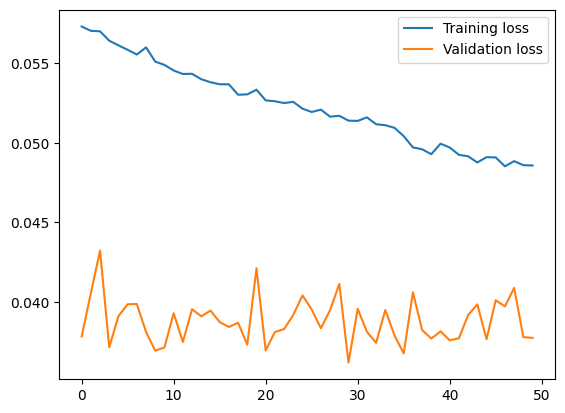

In [43]:
# fit the model
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history_LSTM.history['loss'], label='Training loss')
plt.plot(history_LSTM.history['val_loss'], label='Validation loss')
plt.legend()

In [44]:
true_value = df['traffic_volume'][split_index+20:].values

In [45]:
prediction_LSTM = model_LSTM.predict(X_test)

 28/106 [======>.......................] - ETA: 0s

106/106 [==============================] - 1s 8ms/step


In [46]:
prediction_copies = np.repeat(prediction_LSTM, df_default.shape[1], axis=-1)
pred_LSTM_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

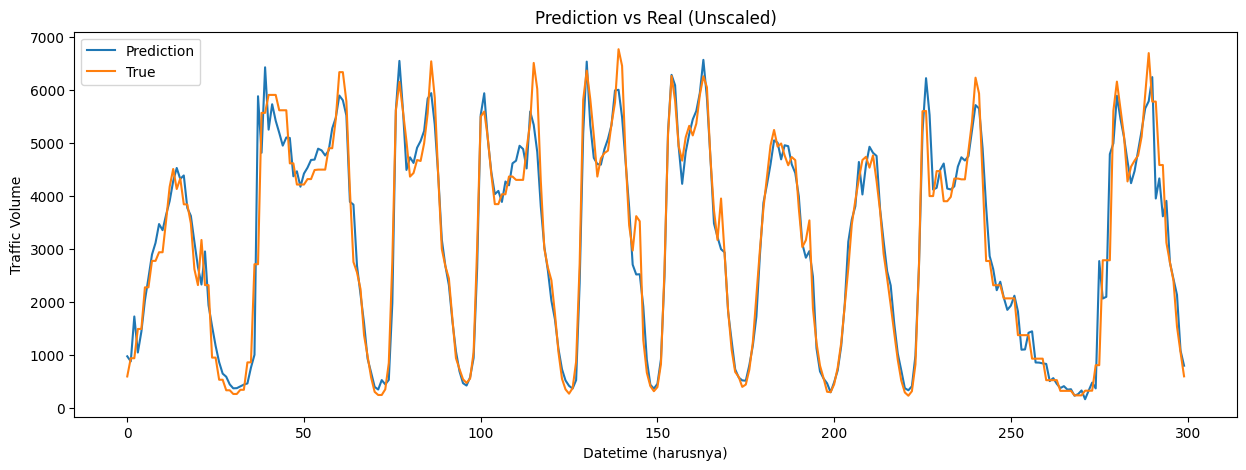

In [47]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_LSTM_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [48]:
from sklearn.metrics import mean_absolute_error

mae_LSTM = mean_absolute_error(pred_LSTM_unscaled, true_value)
print(mae_LSTM)

288.6733552789674


## BiLSTM

In [49]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential

model_BiLSTM = Sequential([
    Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(trainX.shape[1], trainX.shape[2])),
    Bidirectional(LSTM(32, activation='relu', return_sequences=False)),
    Dropout(0.2),
    Dense(trainY.shape[1])
])

model_BiLSTM.compile(optimizer='adam', loss='mae')
model_BiLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 20, 128)           71680     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 112961 (441.25 KB)
Trainable params: 112961 (441.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
1708/1708 [==============================] - 35s 20ms/step - loss: 0.0552 - val_loss: 0.0408
Epoch 2/50
1708/1708 [==============================] - 29s 17ms/step - loss: 0.0548 - val_loss: 0.0399
Epoch 3/50
1708/1708 [==============================] - 30s 18ms/step - loss: 0.0545 - val_loss: 0.0397
Epoch 4/50
1708/1708 [==============================] - 30s 18ms/step - loss: 0.0539 - val_loss: 0.0389
Epoch 5/50
1708/1708 [==============================] - 31s 18ms/step - loss: 0.0534 - val_loss: 0.0469
Epoch 6/50
1708/1708 [==============================] - 32s 19ms/step - loss: 0.0531 - val_loss: 0.0404
Epoch 7/50
1708/1708 [==============================] - 32s 19ms/step - loss: 0.0527 - val_loss: 0.0373
Epoch 8/50
1708/1708 [==============================] - 33s 19ms/step - loss: 0.0523 - val_loss: 0.0393
Epoch 9/50
1708/1708 [==============================] - 34s 20ms/step - loss: 0.0521 - val_loss: 0.0403
Epoch 10/50
1708/1708 [==============================] - 37s 21m

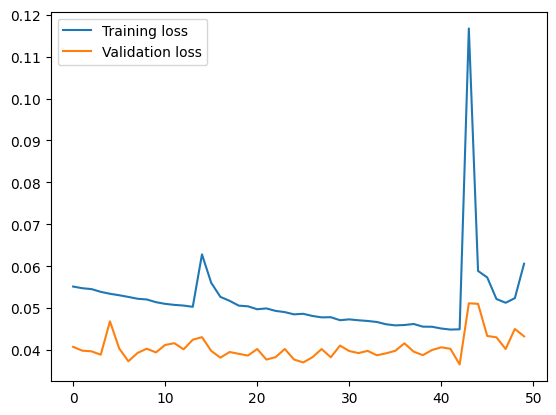

In [55]:
# fit the model
history_BiLSTM = model_BiLSTM.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history_BiLSTM.history['loss'], label='Training loss')
plt.plot(history_BiLSTM.history['val_loss'], label='Validation loss')
plt.legend()

In [56]:
prediction_BiLSTM = model_BiLSTM.predict(X_test)

  1/106 [..............................] - ETA: 4s

106/106 [==============================] - 1s 10ms/step


In [57]:
prediction_copies = np.repeat(prediction_BiLSTM, df_default.shape[1], axis=-1)
pred_BiLSTM_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

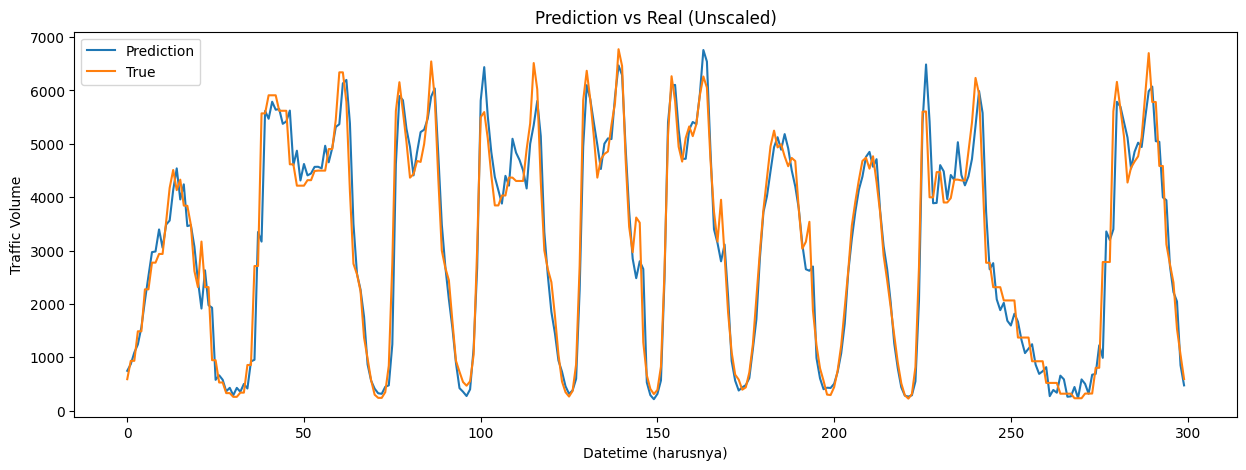

In [53]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_BiLSTM_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error

mae_BiLSTM = mean_absolute_error(pred_BiLSTM_unscaled, true_value)
print(mae_BiLSTM)

313.5855194281797


## GRU

In [59]:
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.models import Sequential

model_GRU = Sequential([
    GRU(64, activation='relu', return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])),
    GRU(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(trainY.shape[1])
])

model_GRU.compile(optimizer='adam', loss='mae')
model_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 20, 64)            27072     
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 36513 (142.63 KB)
Trainable params: 36513 (142.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
1708/1708 [==============================] - 25s 15ms/step - loss: 0.0606 - val_loss: 0.0439
Epoch 2/50
1708/1708 [==============================] - 26s 15ms/step - loss: 0.0598 - val_loss: 0.0390
Epoch 3/50
1708/1708 [==============================] - 28s 16ms/step - loss: 0.0593 - val_loss: 0.0396
Epoch 4/50
1708/1708 [==============================] - 28s 17ms/step - loss: 0.0590 - val_loss: 0.0375
Epoch 5/50
1708/1708 [==============================] - 29s 17ms/step - loss: 0.0587 - val_loss: 0.0496
Epoch 6/50
1708/1708 [==============================] - 29s 17ms/step - loss: 0.0585 - val_loss: 0.0418
Epoch 7/50
1708/1708 [==============================] - 30s 17ms/step - loss: 0.0581 - val_loss: 0.0388
Epoch 8/50
1708/1708 [==============================] - 30s 18ms/step - loss: 0.0579 - val_loss: 0.0451
Epoch 9/50
1708/1708 [==============================] - 31s 18ms/step - loss: 0.0576 - val_loss: 0.0407
Epoch 10/50
1708/1708 [==============================] - 34s 20m

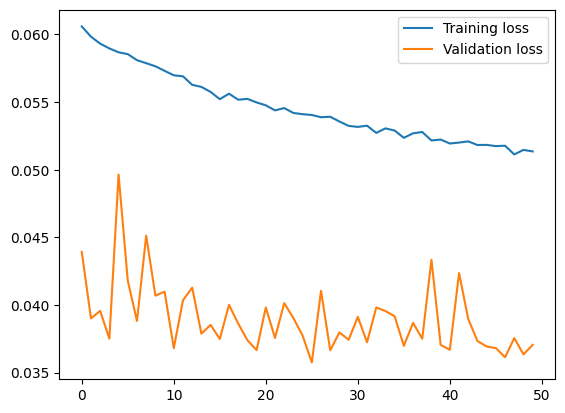

In [65]:
# fit the model
history_GRU = model_GRU.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history_GRU.history['loss'], label='Training loss')
plt.plot(history_GRU.history['val_loss'], label='Validation loss')
plt.legend()

In [66]:
prediction_GRU = model_GRU.predict(X_test)

  1/106 [..............................] - ETA: 6s

106/106 [==============================] - 1s 9ms/step


In [67]:
prediction_copies = np.repeat(prediction_GRU, df_default.shape[1], axis=-1)
pred_GRU_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

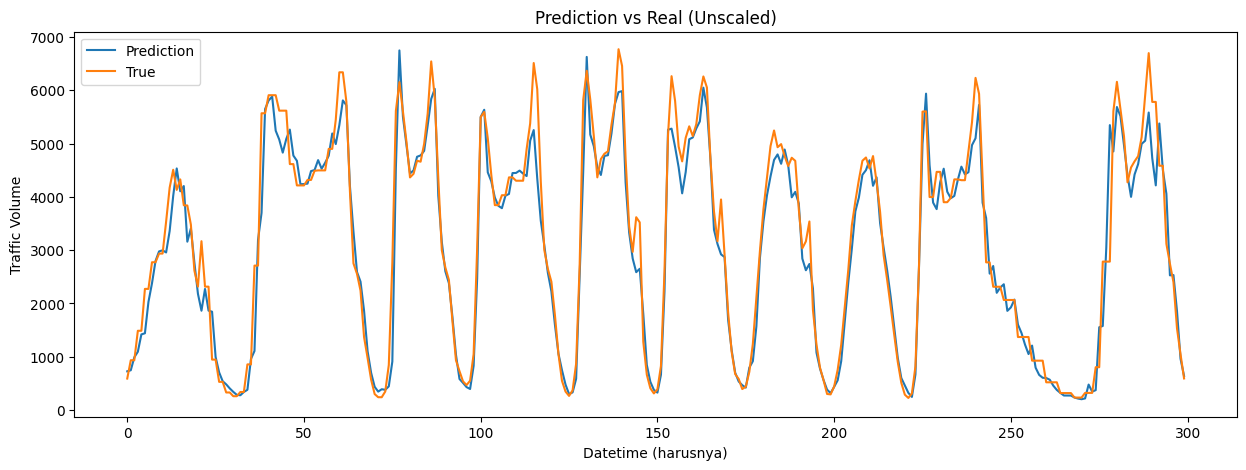

In [68]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_GRU_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [69]:
from sklearn.metrics import mean_absolute_error

mae_GRU = mean_absolute_error(pred_GRU_unscaled, true_value)
print(mae_GRU)

306.5635970540051


## Comparison

In [70]:
print(f'LSTM   : {mae_LSTM}')
print(f'BiLSTM : {mae_BiLSTM}')
print(f'GRU    : {mae_GRU}')

LSTM   : 288.6733552789674
BiLSTM : 313.5855194281797
GRU    : 306.5635970540051


# Tuned Model

## LSTM

In [112]:
from kerastuner.tuners import RandomSearch

def build_model_LSTM(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units_layer1', min_value=32, max_value=128, step=32),
                   activation=hp.Choice('activation', values=['relu', 'tanh']),
                   input_shape=(trainX.shape[1], trainX.shape[2]),
                   return_sequences=True))
    model.add(LSTM(hp.Int('units_layer2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(trainY.shape[1]))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
                  loss='mae')
    return model


In [113]:
tuner_LSTM = RandomSearch(
    build_model_LSTM,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='LSTM',
    project_name='LSTM_tuning'
)

tuner_LSTM.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
 

Trial 10 Complete [00h 05m 54s]
val_loss: 0.025545315196116764

Best val_loss So Far: 0.004156716633588076
Total elapsed time: 01h 13m 54s


In [114]:
# Get the optimal hyperparameters
best_hps_LSTM = tuner_LSTM.get_best_hyperparameters(num_trials=1)[0]

for param in best_hps_LSTM.values:
    print(param, best_hps_LSTM.get(param))

units_layer1 96
activation relu
units_layer2 64
dropout 0.30000000000000004
optimizer adam


In [115]:
# Build the model with the best hyperparameters
model_LSTM_tuned = tuner_LSTM.hypermodel.build(best_hps_LSTM)
history_LSTM_tuned = model_LSTM_tuned.fit(trainX, trainY, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
1055/1055 [==============================] - 22s 18ms/step - loss: 0.0282 - val_loss: 0.0071
Epoch 2/50
1055/1055 [==============================] - 19s 18ms/step - loss: 0.0115 - val_loss: 0.0079
Epoch 3/50
1055/1055 [==============================] - 19s 18ms/step - loss: 0.0097 - val_loss: 0.0055
Epoch 4/50
1055/1055 [==============================] - 19s 18ms/step - loss: 0.0089 - val_loss: 0.0046
Epoch 5/50
1055/1055 [==============================] - 19s 18ms/step - loss: 0.0083 - val_loss: 0.0052
Epoch 6/50
1055/1055 [==============================] - 19s 18ms/step - loss: 0.0079 - val_loss: 0.0084
Epoch 7/50
1055/1055 [==============================] - 19s 18ms/step - loss: 0.0076 - val_loss: 0.0048
Epoch 8/50
1055/1055 [==============================] - 19s 18ms/step - loss: 0.0073 - val_loss: 0.0043
Epoch 9/50
1055/1055 [==============================] - 19s 18ms/step - loss: 0.0070 - val_loss: 0.0046
Epoch 10/50
1055/1055 [==============================] - 19s 18m

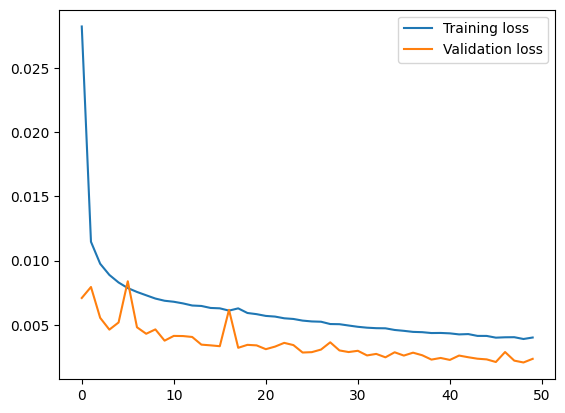

In [116]:
plt.plot(history_LSTM_tuned.history['loss'], label='Training loss')
plt.plot(history_LSTM_tuned.history['val_loss'], label='Validation loss')
plt.legend()

In [117]:
pred_LSTM_tuned = model_LSTM_tuned.predict(X_test)

106/106 [==============================] - 1s 8ms/step


In [118]:
prediction_copies = np.repeat(pred_LSTM_tuned, df_default.shape[1], axis=-1)
pred_LSTM_tuned_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

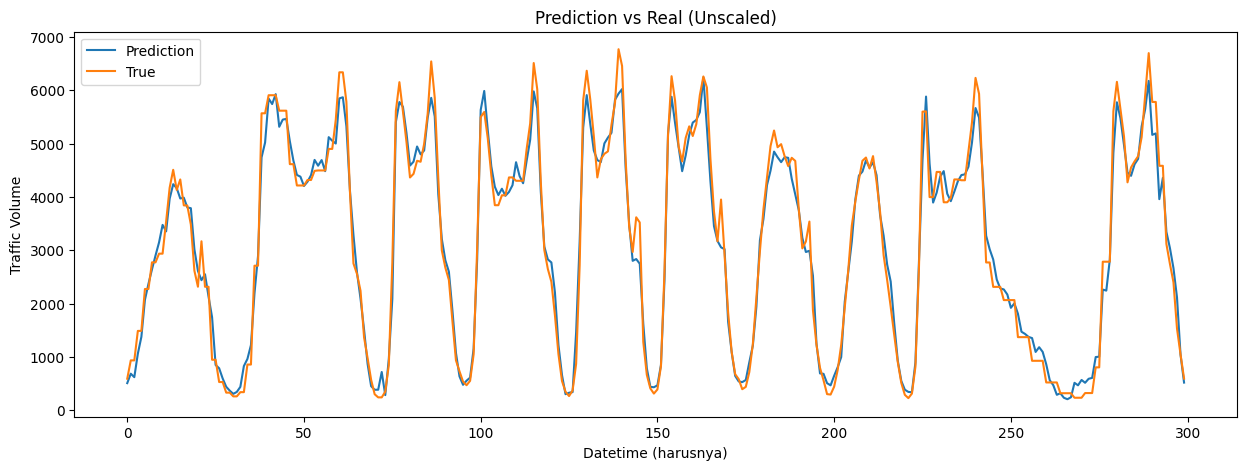

In [119]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_LSTM_tuned_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [120]:
from sklearn.metrics import mean_absolute_error

mae_tuned_LSTM = mean_absolute_error(pred_LSTM_tuned_unscaled, true_value)
print(mae_tuned_LSTM)

243.12090988453227


## BiLSTM

In [121]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

In [122]:
from kerastuner.tuners import RandomSearch

def build_model_BiLSTM(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(hp.Int('units_layer1', min_value=32, max_value=128, step=32),
                                activation=hp.Choice('activation', values=['relu', 'tanh']),
                                input_shape=(trainX.shape[1], trainX.shape[2]),
                                return_sequences=True)))
    model.add(Bidirectional(LSTM(hp.Int('units_layer2', min_value=16, max_value=64, step=16), activation='relu')))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(trainY.shape[1]))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
                  loss='mae')
    return model

In [123]:
tuner_BiLSTM = RandomSearch(
    build_model_BiLSTM,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='BiLSTM',
    project_name='BiLSTM_tuning'
)

tuner_BiLSTM.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 10 Complete [00h 16m 44s]
val_loss: 0.044318592796723046

Best val_loss So Far: 0.04323111226161321
Total elapsed time: 02h 02m 46s


In [124]:
# Get the optimal hyperparameters
best_hps_BiLSTM = tuner_BiLSTM.get_best_hyperparameters(num_trials=1)[0]

for param in best_hps_BiLSTM.values:
    print(param, best_hps_BiLSTM.get(param))

units_layer1 64
activation tanh
units_layer2 32
dropout 0.1
optimizer rmsprop


In [125]:
# Build the model with the best hyperparameters
model_BiLSTM_tuned = tuner_BiLSTM.hypermodel.build(best_hps_BiLSTM)
history_BiLSTM_tuned = model_BiLSTM_tuned.fit(trainX, trainY, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1055/1055 [==============================] - 47s 39ms/step - loss: 0.1059 - val_loss: 0.0655
Epoch 2/50
1055/1055 [==============================] - 40s 38ms/step - loss: 0.0716 - val_loss: 0.0715
Epoch 3/50
1055/1055 [==============================] - 40s 38ms/step - loss: 0.0635 - val_loss: 0.0691
Epoch 4/50
1055/1055 [==============================] - 40s 38ms/step - loss: 0.0589 - val_loss: 0.0633
Epoch 5/50
1055/1055 [==============================] - 40s 38ms/step - loss: 0.0558 - val_loss: 0.0561
Epoch 6/50
1055/1055 [==============================] - 40s 38ms/step - loss: 0.0546 - val_loss: 0.0644
Epoch 7/50
1055/1055 [==============================] - 40s 38ms/step - loss: 0.0529 - val_loss: 0.0589
Epoch 8/50
1055/1055 [==============================] - 40s 38ms/step - loss: 0.0521 - val_loss: 0.0464
Epoch 9/50
1055/1055 [==============================] - 40s 38ms/step - loss: 0.0512 - val_loss: 0.0576
Epoch 10/50
1055/1055 [==============================] - 40s 38m

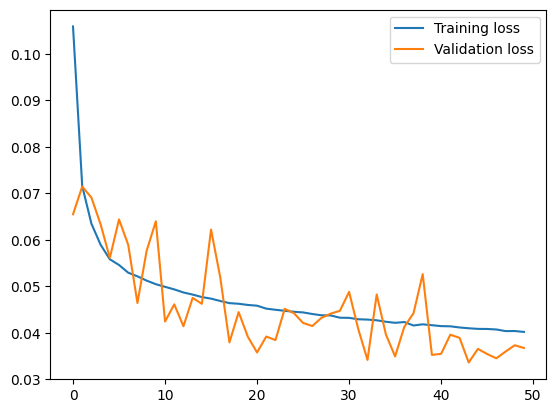

In [126]:
plt.plot(history_BiLSTM_tuned.history['loss'], label='Training loss')
plt.plot(history_BiLSTM_tuned.history['val_loss'], label='Validation loss')
plt.legend()

In [127]:
pred_BiLSTM_tuned = model_BiLSTM_tuned.predict(X_test)

106/106 [==============================] - 2s 14ms/step


In [128]:
prediction_copies = np.repeat(pred_BiLSTM_tuned, df_default.shape[1], axis=-1)
pred_BiLSTM_tuned_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

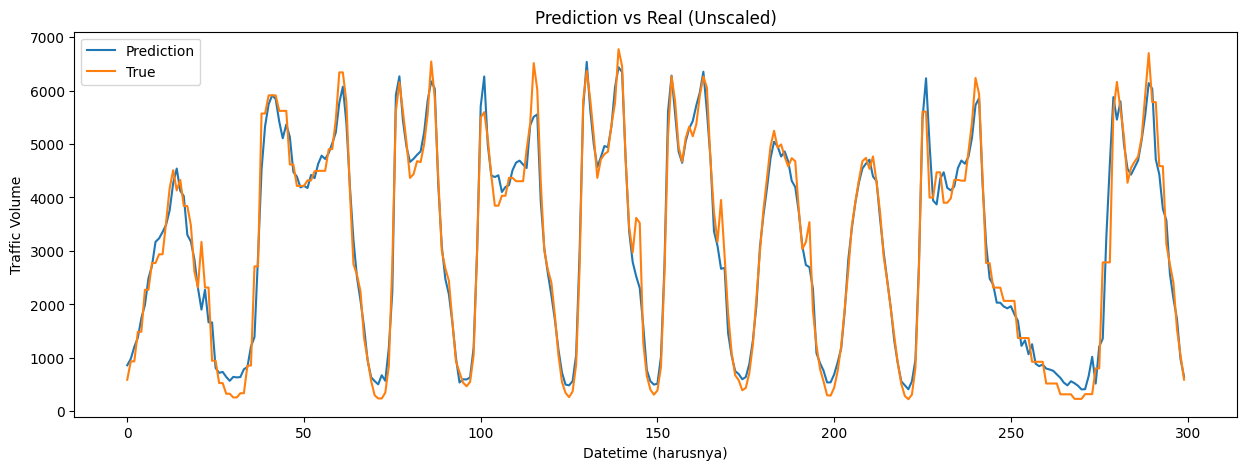

In [129]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_BiLSTM_tuned_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [130]:
from sklearn.metrics import mean_absolute_error

mae_tuned_BiLSTM = mean_absolute_error(pred_BiLSTM_tuned_unscaled, true_value)
print(mae_tuned_BiLSTM)

267.35504835294466


## GRU

In [131]:
from kerastuner.tuners import RandomSearch

def build_model_GRU(hp):
    model = Sequential()
    model.add(GRU(hp.Int('units_layer1', min_value=32, max_value=128, step=32),
                   activation=hp.Choice('activation', values=['relu', 'tanh']),
                   input_shape=(trainX.shape[1], trainX.shape[2]),
                   return_sequences=True))
    model.add(GRU(hp.Int('units_layer2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(trainY.shape[1]))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
                  loss='mae')
    return model

In [132]:
tuner_GRU = RandomSearch(
    build_model_GRU,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='GRU',
    project_name='GRU_tuning'
)

tuner_GRU.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 10 Complete [00h 07m 13s]
val_loss: 0.004505714246382316

Best val_loss So Far: 0.0039923580673833685
Total elapsed time: 01h 34m 18s


In [133]:
# Get the optimal hyperparameters
best_hps_GRU = tuner_GRU.get_best_hyperparameters(num_trials=1)[0]

for param in best_hps_GRU.values:
    print(param, best_hps_GRU.get(param))

units_layer1 96
activation relu
units_layer2 48
dropout 0.2
optimizer adam


In [134]:
# Build the model with the best hyperparameters
model_GRU_tuned = tuner_GRU.hypermodel.build(best_hps_GRU)
history_GRU_tuned = model_GRU_tuned.fit(trainX, trainY, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1055/1055 [==============================] - 28s 24ms/step - loss: 0.0176 - val_loss: 0.0073
Epoch 2/50
1055/1055 [==============================] - 25s 23ms/step - loss: 0.0101 - val_loss: 0.0050
Epoch 3/50
1055/1055 [==============================] - 25s 24ms/step - loss: 0.0087 - val_loss: 0.0048
Epoch 4/50
1055/1055 [==============================] - 25s 24ms/step - loss: 0.0081 - val_loss: 0.0046
Epoch 5/50
1055/1055 [==============================] - 25s 24ms/step - loss: 0.0076 - val_loss: 0.0042
Epoch 6/50
1055/1055 [==============================] - 25s 24ms/step - loss: 0.0073 - val_loss: 0.0060
Epoch 7/50
1055/1055 [==============================] - 25s 24ms/step - loss: 0.0070 - val_loss: 0.0050
Epoch 8/50
1055/1055 [==============================] - 25s 24ms/step - loss: 0.0067 - val_loss: 0.0045
Epoch 9/50
1055/1055 [==============================] - 25s 23ms/step - loss: 0.0065 - val_loss: 0.0041
Epoch 10/50
1055/1055 [==============================] - 25s 24m

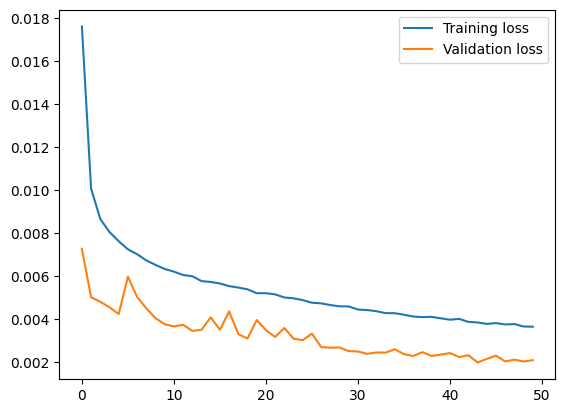

In [135]:
plt.plot(history_GRU_tuned.history['loss'], label='Training loss')
plt.plot(history_GRU_tuned.history['val_loss'], label='Validation loss')
plt.legend()

In [136]:
pred_GRU_tuned = model_GRU_tuned.predict(X_test)

106/106 [==============================] - 1s 8ms/step


In [137]:
prediction_copies = np.repeat(pred_GRU_tuned, df_default.shape[1], axis=-1)
pred_GRU_tuned_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

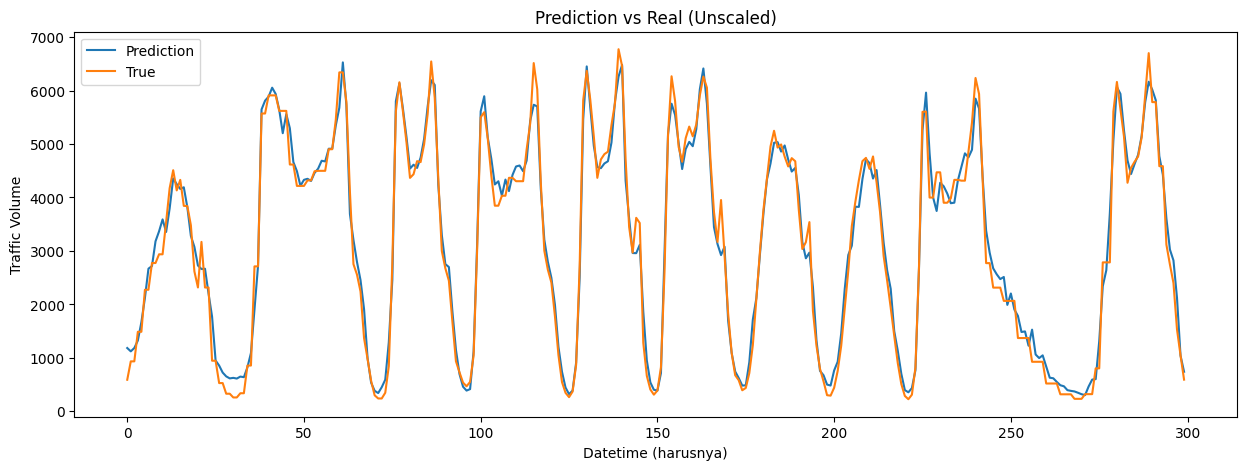

In [138]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_GRU_tuned_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [139]:
from sklearn.metrics import mean_absolute_error

mae_GRU_tuned = mean_absolute_error(pred_GRU_tuned_unscaled, true_value)
print(mae_GRU_tuned)

239.0851323534606


# Explore more about the datetime

Memeriksa apakah ada datetime yang duplikat (apakah ada row dengan datetime yang sama).

In [140]:
df_explore = df_concated.copy()

In [141]:
df_explore[df_explore['date_time'].duplicated() == True].head()

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume
179,2012-10-10 07:00:00,69,23,3,220,3,3,281.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,10,7,6793
181,2012-10-10 08:00:00,82,33,3,150,7,7,280.10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,10,8,6283
183,2012-10-10 09:00:00,188,36,3,170,6,6,279.61,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,10,9,5680
270,2012-10-14 09:00:00,132,37,5,350,8,8,282.43,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14,10,9,2685
271,2012-10-14 09:00:00,285,26,7,330,7,7,282.43,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14,10,9,2685


Menghitung jumlah row duplikat per tanggal. Hasil menunjukkan cukup banyak row yang memiliki datetime yang sama.

In [142]:
value_counts = df_explore['date_time'].value_counts()

duplicates = value_counts[value_counts > 1]

print(duplicates)

date_time
2013-05-19 10:00:00    6
2013-04-18 22:00:00    6
2012-10-26 04:00:00    5
2013-12-03 13:00:00    5
2012-12-16 19:00:00    5
                      ..
2015-09-10 03:00:00    2
2017-04-13 11:00:00    2
2015-09-10 05:00:00    2
2015-08-06 22:00:00    2
2015-08-06 23:00:00    2
Name: count, Length: 3638, dtype: int64


Banyak row dengan datetime yang sama. How to handle?

In [144]:
df_explore['date_time'] = pd.to_datetime(df_explore['date_time'])

In [236]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 75 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   air_pollution_index                                      33750 non-null  int64  
 1   humidity                                                 33750 non-null  int64  
 2   wind_speed                                               33750 non-null  int64  
 3   wind_direction                                           33750 non-null  int64  
 4   visibility_in_miles                                      33750 non-null  int64  
 5   dew_point                                                33750 non-null  int64  
 6   temperature                                              33750 non-null  float64
 7   rain_p_h                                                 33750 non-null  floa

In [146]:
df_average = df_explore.groupby('date_time').mean().reset_index()

In [ ]:
df_average.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28589 entries, 0 to 28588
Data columns (total 73 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   date_time                                                28589 non-null  datetime64[ns]
 1   air_pollution_index                                      28589 non-null  float64       
 2   humidity                                                 28589 non-null  float64       
 3   wind_speed                                               28589 non-null  float64       
 4   wind_direction                                           28589 non-null  float64       
 5   visibility_in_miles                                      28589 non-null  float64       
 6   dew_point                                                28589 non-null  float64       
 7   temperature                                      

In [149]:
pd.set_option('display.max_columns', None)

In [150]:
df_average.head()

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,is_holiday_Christmas Day,is_holiday_Columbus Day,is_holiday_Independence Day,is_holiday_Labor Day,is_holiday_Martin Luther King Jr Day,is_holiday_Memorial Day,is_holiday_New Years Day,is_holiday_State Fair,is_holiday_Thanksgiving Day,is_holiday_Veterans Day,is_holiday_Washingtons Birthday,is_holiday_nan,weather_type_Clear,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm,weather_description_SQUALLS,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume
0,2012-10-02 09:00:00,121.0,89.0,2.0,329.0,1.0,1.0,288.28,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,9.0,5545.0
1,2012-10-02 10:00:00,178.0,67.0,3.0,330.0,1.0,1.0,289.36,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,10.0,4516.0
2,2012-10-02 11:00:00,113.0,66.0,3.0,329.0,2.0,2.0,289.58,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,11.0,4767.0
3,2012-10-02 12:00:00,20.0,66.0,3.0,329.0,5.0,5.0,290.13,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,12.0,5026.0
4,2012-10-02 13:00:00,281.0,65.0,3.0,329.0,7.0,7.0,291.14,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,13.0,4918.0


In [151]:
value_counts = df_average['date_time'].value_counts()

duplicates = value_counts[value_counts > 1]

print(duplicates)

Series([], Name: count, dtype: int64)


Check, is there any row with deifferent value on the boolean cols (indicated by the existence of non-boolean value)

In [152]:
for i in range (11, 72):
    print(df_average.iloc[:, [i]].value_counts())

is_holiday_Christmas Day
0.0                         28585
1.0                             4
Name: count, dtype: int64
is_holiday_Columbus Day
0.0                        28585
1.0                            4
Name: count, dtype: int64
is_holiday_Independence Day
0.0                            28586
1.0                                3
Name: count, dtype: int64
is_holiday_Labor Day
0.0                     28586
1.0                         3
Name: count, dtype: int64
is_holiday_Martin Luther King Jr Day
0.0                                     28587
1.0                                         2
Name: count, dtype: int64
is_holiday_Memorial Day
0.0                        28586
1.0                            3
Name: count, dtype: int64
is_holiday_New Years Day
0.0                         28585
1.0                             4
Name: count, dtype: int64
is_holiday_State Fair
0.0                      28586
1.0                          3
Name: count, dtype: int64
is_holiday_Thanksgiving Day
0.

In [153]:
df_booled = df_average.copy()

In [154]:
for i in range (11, 72):
    df_booled.iloc[:, [i]] = df_booled.iloc[:, [i]].round().astype(bool)

In [155]:
df_booled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28589 entries, 0 to 28588
Data columns (total 76 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   date_time                                                28589 non-null  datetime64[ns]
 1   air_pollution_index                                      28589 non-null  float64       
 2   humidity                                                 28589 non-null  float64       
 3   wind_speed                                               28589 non-null  float64       
 4   wind_direction                                           28589 non-null  float64       
 5   visibility_in_miles                                      28589 non-null  float64       
 6   dew_point                                                28589 non-null  float64       
 7   temperature                                      

In [156]:
for i in range (11, 72):
    print(df_booled.iloc[:, [i]].value_counts())

is_holiday_Christmas Day
False                       28585
True                            4
Name: count, dtype: int64
is_holiday_Columbus Day
False                      28585
True                           4
Name: count, dtype: int64
is_holiday_Independence Day
False                          28586
True                               3
Name: count, dtype: int64
is_holiday_Labor Day
False                   28586
True                        3
Name: count, dtype: int64
is_holiday_Martin Luther King Jr Day
False                                   28587
True                                        2
Name: count, dtype: int64
is_holiday_Memorial Day
False                      28586
True                           3
Name: count, dtype: int64
is_holiday_New Years Day
False                       28585
True                            4
Name: count, dtype: int64
is_holiday_State Fair
False                    28586
True                         3
Name: count, dtype: int64
is_holiday_Thanksgiving Day
Fa

Check, how many record occur on one day

In [157]:
df_daily = df_booled.copy()
df_daily['date'] = df_daily['date_time'].dt.date

In [158]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28589 entries, 0 to 28588
Data columns (total 77 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   date_time                                                28589 non-null  datetime64[ns]
 1   air_pollution_index                                      28589 non-null  float64       
 2   humidity                                                 28589 non-null  float64       
 3   wind_speed                                               28589 non-null  float64       
 4   wind_direction                                           28589 non-null  float64       
 5   visibility_in_miles                                      28589 non-null  float64       
 6   dew_point                                                28589 non-null  float64       
 7   temperature                                      

Check is there any day that have no record

In [159]:
daily_counts = df_daily.groupby('date').size()

In [160]:
daily_counts.value_counts()

24    736
23    145
22     69
21     59
13     52
14     37
17     31
20     30
15     30
16     27
12     26
19     25
18     24
11     11
1       9
6       8
9       7
3       7
2       7
8       6
10      5
4       5
5       2
7       1
Name: count, dtype: int64

In [161]:
df_daily['date'] = pd.to_datetime(df_daily['date'])

In [162]:
df_daily

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,is_holiday_Christmas Day,is_holiday_Columbus Day,is_holiday_Independence Day,is_holiday_Labor Day,is_holiday_Martin Luther King Jr Day,is_holiday_Memorial Day,is_holiday_New Years Day,is_holiday_State Fair,is_holiday_Thanksgiving Day,is_holiday_Veterans Day,is_holiday_Washingtons Birthday,is_holiday_nan,weather_type_Clear,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm,weather_description_SQUALLS,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume,date
0,2012-10-02 09:00:00,121.000000,89.0,2.0,329.0,1.000000,1.000000,288.28,0.0,0.0,40.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,9.0,5545.0,2012-10-02
1,2012-10-02 10:00:00,178.000000,67.0,3.0,330.0,1.000000,1.000000,289.36,0.0,0.0,75.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,10.0,4516.0,2012-10-02
2,2012-10-02 11:00:00,113.000000,66.0,3.0,329.0,2.000000,2.000000,289.58,0.0,0.0,90.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,11.0,4767.0,2012-10-02
3,2012-10-02 12:00:00,20.000000,66.0,3.0,329.0,5.000000,5.000000,290.13,0.0,0.0,90.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,12.0,5026.0,20

In [163]:
complete_date_range = pd.date_range(start=df_daily['date'].min(), end=df_daily['date'].max())

# Identify missing dates (holes)
missing_dates = complete_date_range[~complete_date_range.isin(df_daily['date'])]

if missing_dates.empty:
    print("No holes in the date column.")
else:
    print("Holes found in the date column:")
    print(missing_dates)

Holes found in the date column:
DatetimeIndex(['2013-10-28', '2013-10-29', '2013-10-30', '2013-10-31',
               '2013-11-01', '2013-11-02', '2013-11-03', '2013-11-04',
               '2013-11-05', '2014-04-30',
               ...
               '2015-06-10', '2015-06-15', '2015-06-16', '2015-06-17',
               '2015-06-18', '2015-06-21', '2015-06-23', '2015-10-24',
               '2015-10-25', '2015-10-26'],
              dtype='datetime64[ns]', length=330, freq=None)


In [164]:
df_missingDate = pd.DataFrame(missing_dates)

In [165]:
df_missingDate['date'] = pd.to_datetime(df_missingDate[0])

In [166]:
df_missingDate['year'] = df_missingDate['date'].dt.year

In [167]:
df_missingDate['month'] = df_missingDate['date'].dt.month

In [168]:
df_missingDate['day'] = df_missingDate['date'].dt.day

In [172]:
print(df_missingDate.groupby('year').count())

        0  date  month  day
year                       
2013    9     9      9    9
2014  151   151    151  151
2015  170   170    170  170


In [173]:
df_daily[df_daily['date']=='2013-10-28']

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,is_holiday_Christmas Day,is_holiday_Columbus Day,is_holiday_Independence Day,is_holiday_Labor Day,is_holiday_Martin Luther King Jr Day,is_holiday_Memorial Day,is_holiday_New Years Day,is_holiday_State Fair,is_holiday_Thanksgiving Day,is_holiday_Veterans Day,is_holiday_Washingtons Birthday,is_holiday_nan,weather_type_Clear,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm,weather_description_SQUALLS,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume,date


In [178]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 76 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   date_time                                                33750 non-null  datetime64[ns]
 1   air_pollution_index                                      33750 non-null  int64         
 2   humidity                                                 33750 non-null  int64         
 3   wind_speed                                               33750 non-null  int64         
 4   wind_direction                                           33750 non-null  int64         
 5   visibility_in_miles                                      33750 non-null  int64         
 6   dew_point                                                33750 non-null  int64         
 7   temperature                                      

Summerize date_time problem:
- there's 'duplicated' datetime
- the amount of record each day is different
- there's some holes on the record (some days doesn't even have record)

How to handle?
- groupby().mean()
- bfill/ffill
- use firsthalf/secondhalf

let's divide the dataset into 'first half' and 'second half'

In [277]:
df_cutt = df_explore.copy()

In [237]:
df_booled.info()
df_booled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28589 entries, 0 to 28588
Data columns (total 76 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   date_time                                                28589 non-null  datetime64[ns]
 1   air_pollution_index                                      28589 non-null  float64       
 2   humidity                                                 28589 non-null  float64       
 3   wind_speed                                               28589 non-null  float64       
 4   wind_direction                                           28589 non-null  float64       
 5   visibility_in_miles                                      28589 non-null  float64       
 6   dew_point                                                28589 non-null  float64       
 7   temperature                                      

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,is_holiday_Christmas Day,is_holiday_Columbus Day,is_holiday_Independence Day,is_holiday_Labor Day,is_holiday_Martin Luther King Jr Day,is_holiday_Memorial Day,is_holiday_New Years Day,is_holiday_State Fair,is_holiday_Thanksgiving Day,is_holiday_Veterans Day,is_holiday_Washingtons Birthday,is_holiday_nan,weather_type_Clear,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm,weather_description_SQUALLS,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume
0,2012-10-02 09:00:00,121.0,89.0,2.0,329.0,1.0,1.0,288.28,0.0,0.0,40.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,9.0,5545.0
1,2012-10-02 10:00:00,178.0,67.0,3.0,330.0,1.0,1.0,289.36,0.0,0.0,75.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,10.0,4516.0
2,2012-10-02 11:00:00,113.0,66.0,3.0,329.0,2.0,2.0,289.58,0.0,0.0,90.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,11.0,4767.0
3,2012-10-02 12:00:00,20.0,66.0,3.0,329.0,5.0,5.0,290.13,0.0,0.0,90.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,12.0,5026.0
4,2012-10-02 13:00:00,281.0,65.0,3.0,329.0,7.0,7.0,291.14,0.0,0.0,75.0,False,False,False,False,False

In [240]:
df_cutt = df_booled.copy()

In [241]:
# Set the 'datetime_col' as the index of the DataFrame
df_cutt = df_cutt.set_index('date_time')

KeyError: "None of ['date_time'] are in the columns"

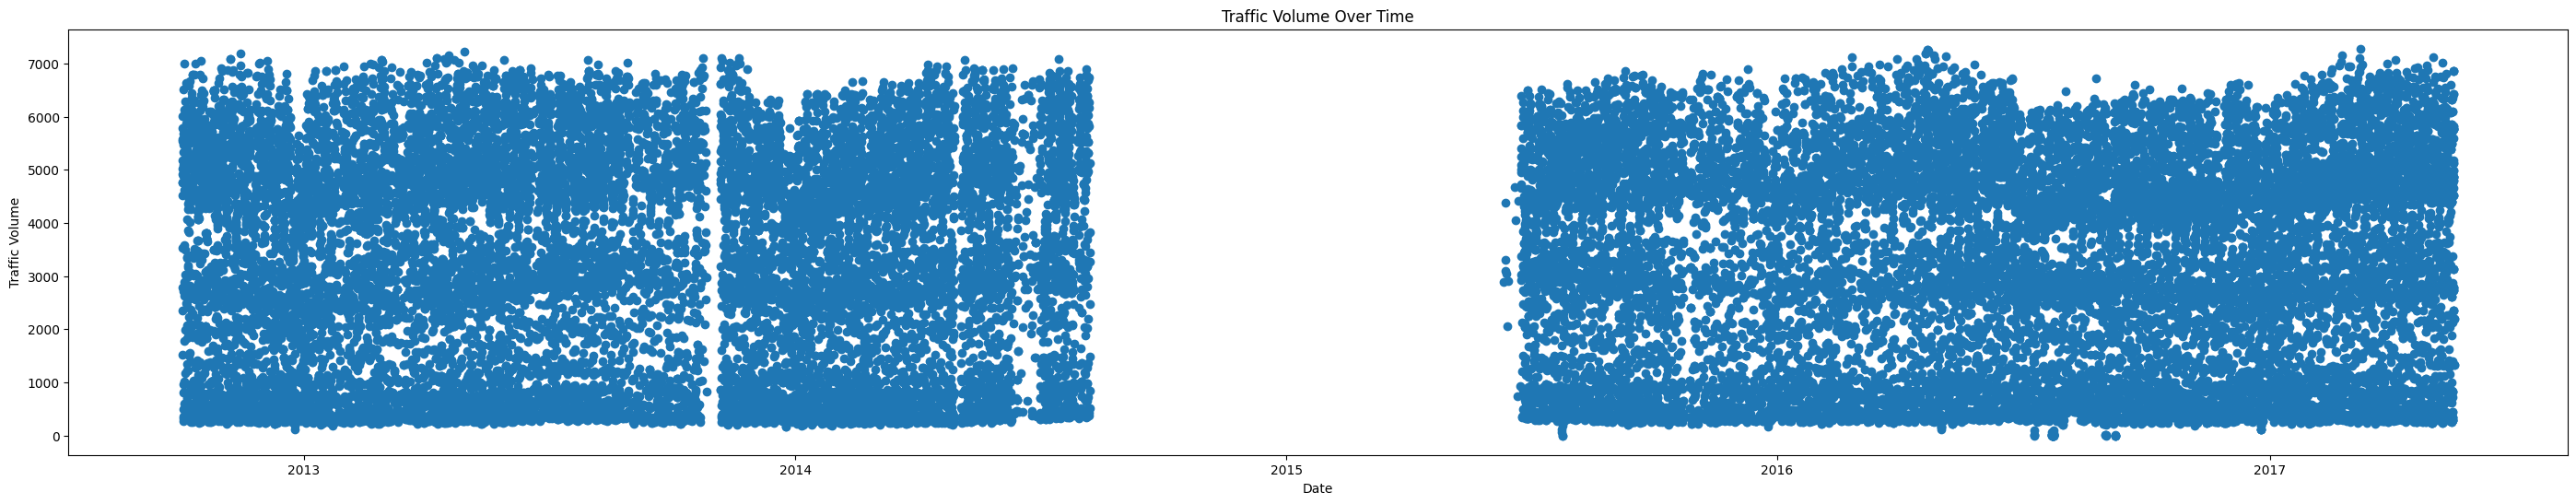

In [243]:
plt.figure(figsize=(35, 6))
plt.scatter(df_explore.index,df_explore['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.show()

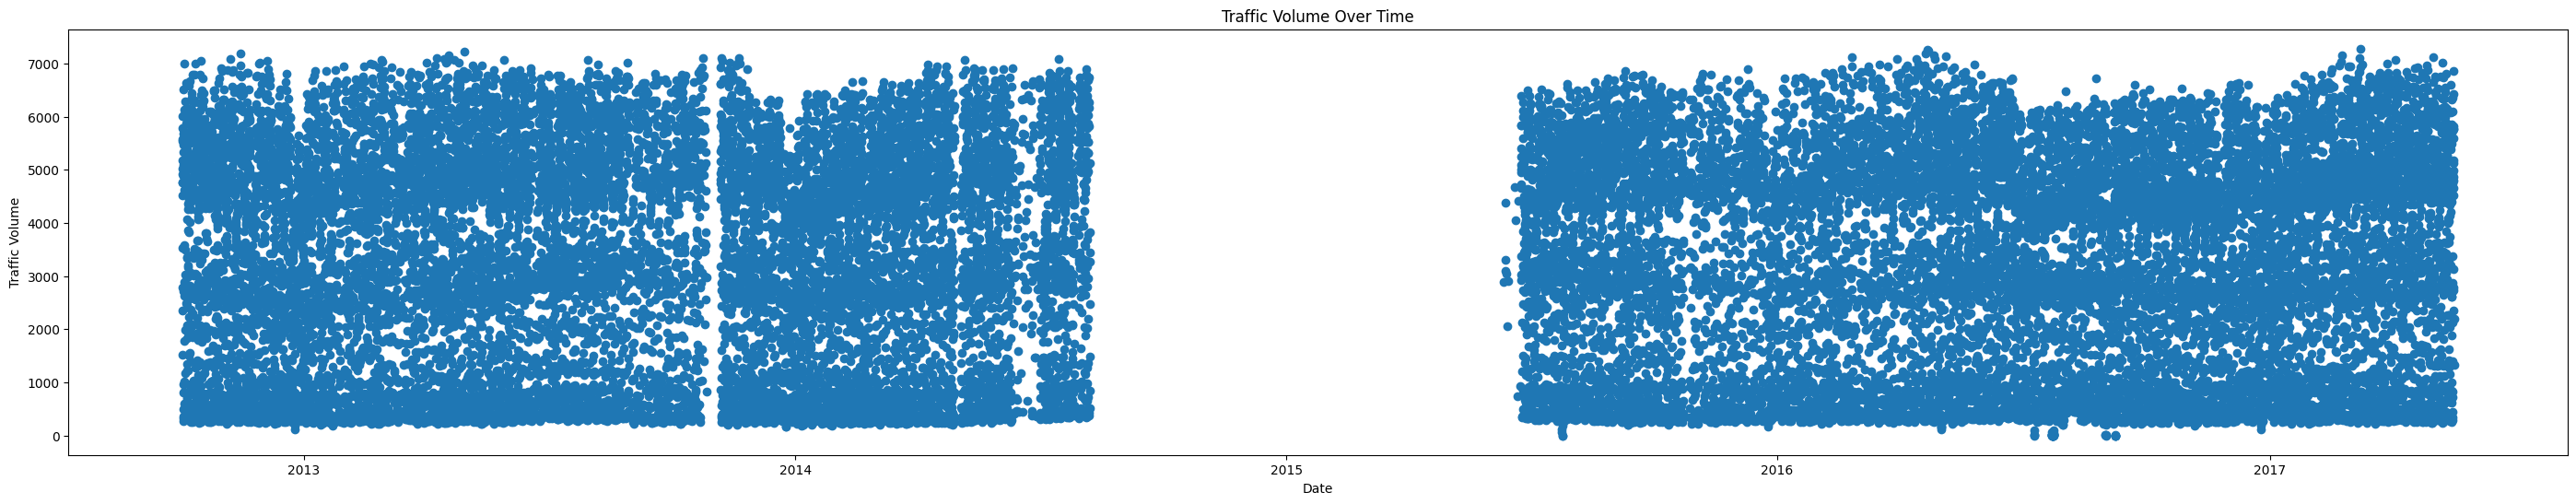

In [244]:
plt.figure(figsize=(35, 6))
plt.scatter(df_cutt.index,df_cutt['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.show()

In [246]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 75 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   air_pollution_index                                      33750 non-null  int64  
 1   humidity                                                 33750 non-null  int64  
 2   wind_speed                                               33750 non-null  int64  
 3   wind_direction                                           33750 non-null  int64  
 4   visibility_in_miles                                      33750 non-null  int64  
 5   dew_point                                                33750 non-null  int64  
 6   temperature                                              33750 non-null  float64
 7   rain_p_h                                                 33750 non-null  floa

In [245]:
df_cutt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28589 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 75 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   air_pollution_index                                      28589 non-null  float64
 1   humidity                                                 28589 non-null  float64
 2   wind_speed                                               28589 non-null  float64
 3   wind_direction                                           28589 non-null  float64
 4   visibility_in_miles                                      28589 non-null  float64
 5   dew_point                                                28589 non-null  float64
 6   temperature                                              28589 non-null  float64
 7   rain_p_h                                                 28589 non-null  floa

In [247]:
firsthalf_last_index = df_cutt.loc[df_cutt.index.year == 2014].index.max()
print(firsthalf_last_index)

2014-08-08 01:00:00


In [248]:
secondhalf_first_index = df_cutt.loc[df_cutt.index.year == 2015].index.min()
print(secondhalf_first_index)

2015-06-11 20:00:00


In [249]:
df_firsth = df_cutt[:firsthalf_last_index]

In [250]:
df_firsth.info()
df_firsth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13898 entries, 2012-10-02 09:00:00 to 2014-08-08 01:00:00
Data columns (total 75 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   air_pollution_index                                      13898 non-null  float64
 1   humidity                                                 13898 non-null  float64
 2   wind_speed                                               13898 non-null  float64
 3   wind_direction                                           13898 non-null  float64
 4   visibility_in_miles                                      13898 non-null  float64
 5   dew_point                                                13898 non-null  float64
 6   temperature                                              13898 non-null  float64
 7   rain_p_h                                                 13898 non-null  floa

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,is_holiday_Christmas Day,is_holiday_Columbus Day,is_holiday_Independence Day,is_holiday_Labor Day,is_holiday_Martin Luther King Jr Day,is_holiday_Memorial Day,is_holiday_New Years Day,is_holiday_State Fair,is_holiday_Thanksgiving Day,is_holiday_Veterans Day,is_holiday_Washingtons Birthday,is_holiday_nan,weather_type_Clear,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm,weather_description_SQUALLS,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,121.0,89.0,2.0,329.0,1.0,1.0,288.28,0.0,0.0,40.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,9.0,5545.0
2012-10-02 10:00:00,178.0,67.0,3.0,330.0,1.0,1.0,289.36,0.0,0.0,75.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,10.0,4516.0
2012-10-02 11:00:00,113.0,66.0,3.0,329.0,2.0,2.0,289.58,0.0,0.0,90.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,11.0,4767.0
2012-10-02 12:00:00,20.0,66.0,3.0,329.0,5.0,5.0,290.13,0.0,0.0,90.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,10.0,12.0,5026.0
2012-10-02 13:00:00,281.0,65.0,3.

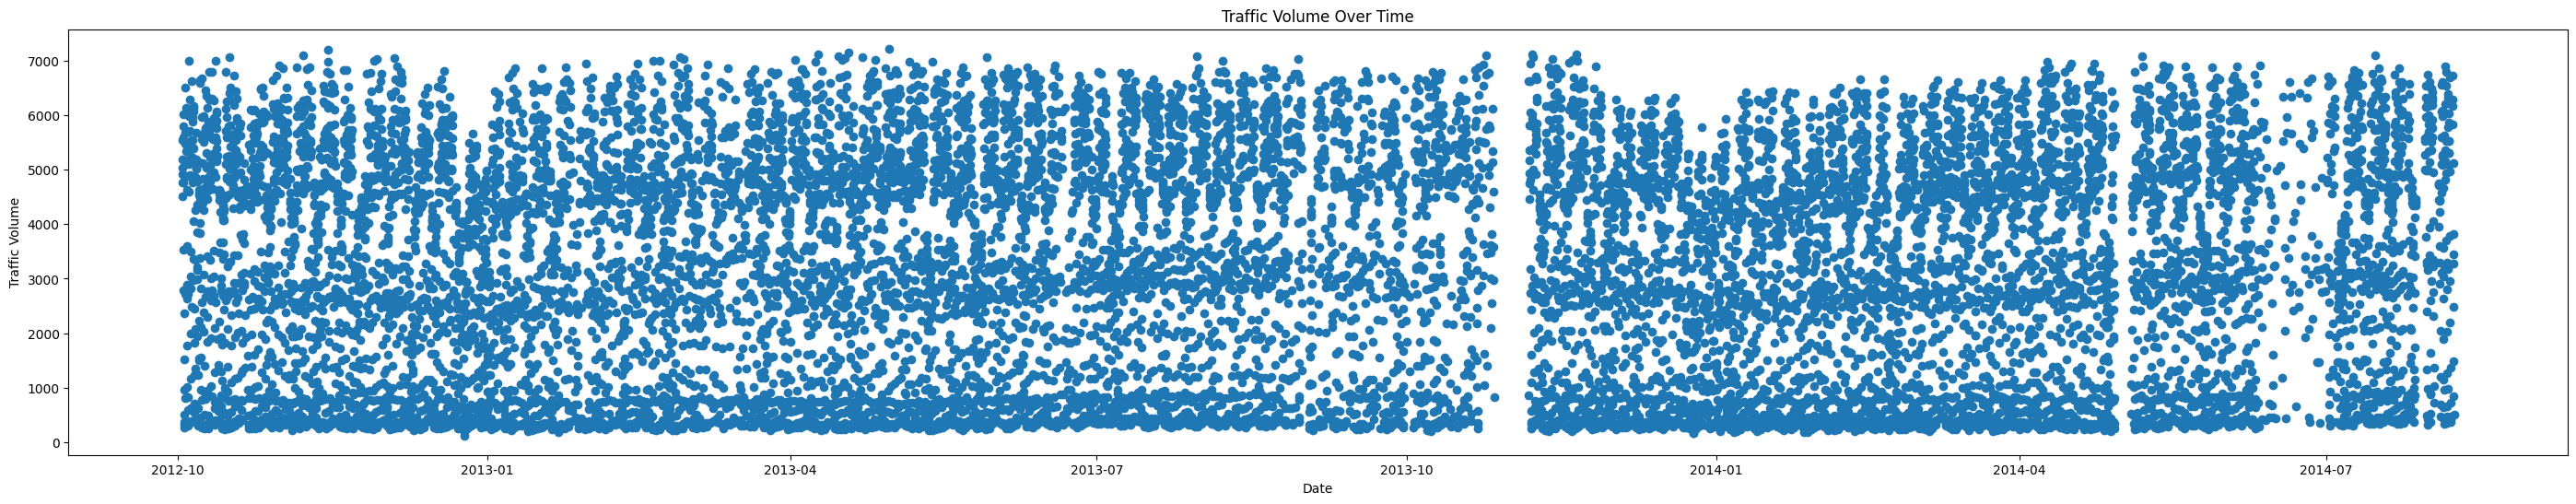

In [251]:
plt.figure(figsize=(35, 6))
plt.scatter(df_firsth.index,df_firsth['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.show()

In [252]:
df_secondh = df_cutt[secondhalf_first_index:]

In [253]:
df_secondh.info()
df_secondh.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14691 entries, 2015-06-11 20:00:00 to 2017-05-17 23:00:00
Data columns (total 75 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   air_pollution_index                                      14691 non-null  float64
 1   humidity                                                 14691 non-null  float64
 2   wind_speed                                               14691 non-null  float64
 3   wind_direction                                           14691 non-null  float64
 4   visibility_in_miles                                      14691 non-null  float64
 5   dew_point                                                14691 non-null  float64
 6   temperature                                              14691 non-null  float64
 7   rain_p_h                                                 14691 non-null  floa

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,is_holiday_Christmas Day,is_holiday_Columbus Day,is_holiday_Independence Day,is_holiday_Labor Day,is_holiday_Martin Luther King Jr Day,is_holiday_Memorial Day,is_holiday_New Years Day,is_holiday_State Fair,is_holiday_Thanksgiving Day,is_holiday_Veterans Day,is_holiday_Washingtons Birthday,is_holiday_nan,weather_type_Clear,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm,weather_description_SQUALLS,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-06-11 20:00:00,282.0,65.0,3.0,327.0,5.0,5.0,287.586,0.0,0.0,92.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,11.0,6.0,20.0,2886.0
2015-06-12 18:00:00,84.0,65.0,3.0,325.0,6.0,6.0,297.543,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,12.0,6.0,18.0,4380.0
2015-06-12 20:00:00,97.0,63.0,3.0,323.0,2.0,2.0,292.061,0.0,0.0,8.0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,12.0,6.0,20.0,3095.0
2015-06-12 21:00:00,29.0,63.0,2.0,320.0,5.0,5.0,292.061,0.0,0.0,8.0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,12.0,6.0,21.0,3299.0
2015-06-13 21:00:00,78.0,68.0,3.0

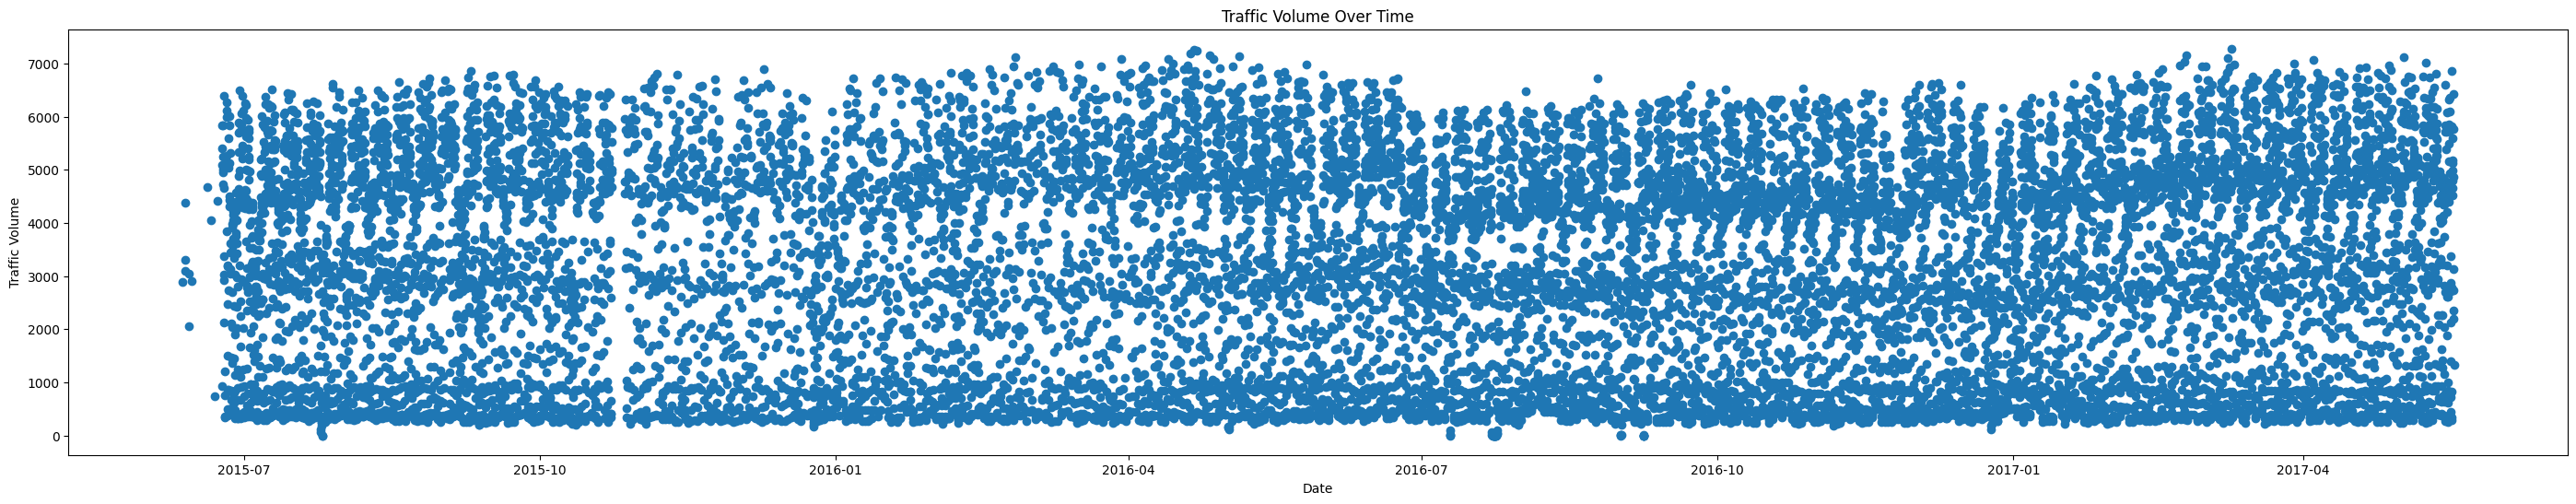

In [254]:
plt.figure(figsize=(35, 6))
plt.scatter(df_secondh.index,df_secondh['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.show()

let's do some gapfilling

## first half

In [256]:
first_index =  df_firsth.index.min()

how much gap that we'll fill?

In [257]:
# Create a date range with hourly frequency
date_range_firsth = pd.date_range(start=first_index, end=firsthalf_last_index, freq='H')

# Display the result
print(date_range_firsth)

DatetimeIndex(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
               '2012-10-02 11:00:00', '2012-10-02 12:00:00',
               '2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               ...
               '2014-08-07 16:00:00', '2014-08-07 17:00:00',
               '2014-08-07 18:00:00', '2014-08-07 19:00:00',
               '2014-08-07 20:00:00', '2014-08-07 21:00:00',
               '2014-08-07 22:00:00', '2014-08-07 23:00:00',
               '2014-08-08 00:00:00', '2014-08-08 01:00:00'],
              dtype='datetime64[ns]', length=16193, freq='H')


In [258]:

print(f'we will fill {len(date_range_firsth) - len(df_firsth.index)} row')

we will fill 2295 row


In [259]:
df_index = pd.DataFrame(date_range_firsth)

In [260]:
df_index.info()
df_index.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16193 entries, 0 to 16192
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       16193 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 126.6 KB


,0
0,2012-10-02 09:00:00
1,2012-10-02 10:00:00
2,2012-10-02 11:00:00
3,2012-10-02 12:00:00
4,2012-10-02 13:00:00


In [261]:
df_index_true = pd.DataFrame(df_firsth.index)

In [262]:
df_index.rename(columns={0:'date_time'}, inplace=True)

In [263]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16193 entries, 0 to 16192
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  16193 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 126.6 KB


In [265]:
df_index_true.info()
df_index_true.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13898 entries, 0 to 13897
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  13898 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 108.7 KB


,date_time
0,2012-10-02 09:00:00
1,2012-10-02 10:00:00
2,2012-10-02 11:00:00
3,2012-10-02 12:00:00
4,2012-10-02 13:00:00


In [266]:
df_index_true['stat'] = 1

In [267]:
df_merged = pd.merge(df_index, df_index_true, on='date_time', how='left')

In [268]:
df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16193 entries, 0 to 16192
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  16193 non-null  datetime64[ns]
 1   stat       13898 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 253.1 KB


,date_time,stat
0,2012-10-02 09:00:00,1.0
1,2012-10-02 10:00:00,1.0
2,2012-10-02 11:00:00,1.0
3,2012-10-02 12:00:00,1.0
4,2012-10-02 13:00:00,1.0


In [269]:
df_index.tail()

,date_time
16188,2014-08-07 21:00:00
16189,2014-08-07 22:00:00
16190,2014-08-07 23:00:00
16191,2014-08-08 00:00:00
16192,2014-08-08 01:00:00


In [270]:
df_index_true.tail()

,date_time,stat
13893,2014-08-07 21:00:00,1
13894,2014-08-07 22:00:00,1
13895,2014-08-07 23:00:00,1
13896,2014-08-08 00:00:00,1
13897,2014-08-08 01:00:00,1


In [276]:
df_merged[df_merged['stat']!=1]

,date_time,stat
22,2012-10-03 07:00:00,NaN
25,2012-10-03 10:00:00,NaN
26,2012-10-03 11:00:00,NaN
32,2012-10-03 17:00:00,NaN
65,2012-10-05 02:00:00,NaN
...,...,...
16176,2014-08-07 09:00:00,NaN
16177,2014-08-07 10:00:00,NaN
16178,2014-08-07 11:00:00,NaN
16179,2014-08-07 12:00:00,NaN


In [274]:
df_hmm = df_merged[df_merged['stat']!=1]

In [275]:
df_hmm.info()
df_hmm.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2295 entries, 22 to 16180
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  2295 non-null   datetime64[ns]
 1   stat       0 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.8 KB


,date_time,stat
22,2012-10-03 07:00:00,NaN
25,2012-10-03 10:00:00,NaN
26,2012-10-03 11:00:00,NaN
32,2012-10-03 17:00:00,NaN
65,2012-10-05 02:00:00,NaN


In [233]:
df_index_true[df_index_true['date_time']=='2012-10-03 07:00:00']

,date_time,stat


In [234]:
df_index[df_index['date_time']=='2012-10-03 07:00:00']

,date_time
22,2012-10-03 07:00:00


In [235]:
df_index_true.duplicated().sum()

2073

In [ ]:
df_index